In [17]:
from Labelisation_function import Labelisation
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from Non_linked_labelisation_function import non_linked_Labelisation
import cv2
import PIL

In [18]:
links, links_shown, labels = Labelisation("boo16_16.png", 1)
links2, links_shown2, labels2 = non_linked_Labelisation("boo16_16.png", 1)
def clamp(n, smallest, largest):

    return max(smallest, min(n, largest))


c:\Users\zroun\Documents\IMI\Projet_pixel\Labelisation_function.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
  return np.sqrt((image[x1][0]-image[x2][0])**2+(image[x1][1]-image[x2][1])**2+(image[x1][2]-image[x2][2])**2)
c:\Users\zroun\Documents\IMI\Projet_pixel\Non_linked_labelisation_function.py:26: RuntimeWarning: overflow encountered in ubyte_scalars
  return np.sqrt((image[x1][0]-image[x2][0])**2+(image[x1][1]-image[x2][1])**2+(image[x1][2]-image[x2][2])**2)


0.0


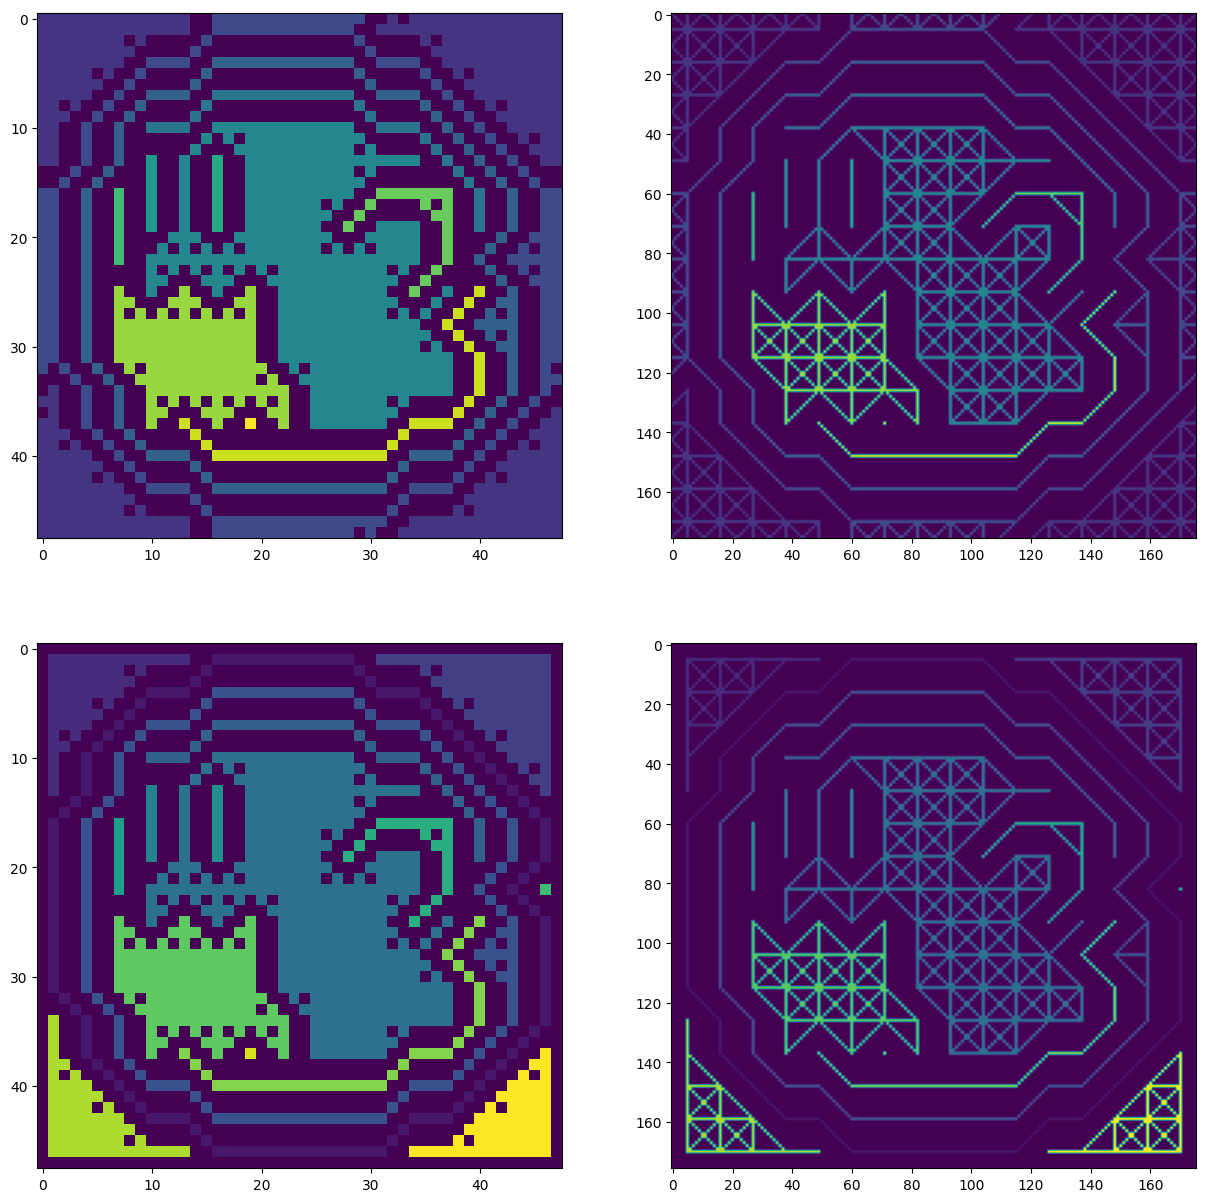

In [33]:
width, height= np.shape(links_shown)
new_width = np.uint(width/3*11)
new_height = np.uint(height/3*11)




def filler(links_shown,i,j):
    fill=np.zeros((5,5))
    #Si on a un lien
    if links_shown[i,j]!=0:
        #Si on a un point sur de la diagonale haut gauche bas droite
        if (((i%3==0 and j%3==0)or (i%3==2 and j%3==2))):
            for u in range(-2,3):
                for v in range(-2,3):
                    if u==v:
                        fill[u+2,v+2]=links_shown[i,j]
        
        #Si on a un point sur de la diagonale haut droite bas gauche
        elif (((i%3==0 and j%3==2) or (i%3==2 and j%3==0))):
            for u in range(-2,3):
                for v in range(-2,3):
                    if u==-v:
                        fill[u+2,v+2]=links_shown[i,j]
        #Si on a un point sur une ligne horizontale
        elif (i%3==1 and (j%3==0 or j%3==2)):
            for u in range(-2,3):
                for v in range(-2,3):
                    if u==0:
                        fill[u+2,v+2]=links_shown[i,j]
        #Si on a un point sur une ligne verticale
        elif (j%3==1 and (i%3==0 or i%3==2)):
            for u in range(-2,3):
                for v in range(-2,3):
                    if v==0:
                        fill[u+2,v+2]=links_shown[i,j]


                
    return fill



def extended_links(links_shown):
    new_links_shown=np.zeros((new_width,new_height))
    width,height=np.shape(links_shown)
    #On créé une matrice de lien étendue 
    for i in range(width):
        for j in range(height):
            new_links_shown[2+(3*(i%3))+11*(i//3),2+(3*(j%3))+11*(j//3)]=links_shown[i,j]

    k=np.zeros((5,5))
    for i in range(width):
        for j in range(height):
            if i%3!=1 or j%3!=1:
                fill = filler(links_shown,i,j)
                for u in range(-2,3):
                    for v in range(-2,3):
                        if fill[u+2,v+2]!=0:
                            new_links_shown[2+(3*(i%3))+11*(i//3)+u,2+(3*(j%3))+11*(j//3)+v]=fill[u+2,v+2]

    return new_links_shown



print(links_shown2[0,0])
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.imshow(links_shown)
plt.subplot(2, 2, 2)
plt.imshow(extended_links(links_shown))
plt.subplot(2, 2, 3)
plt.imshow(links_shown2)
plt.subplot(2, 2, 4)
plt.imshow(extended_links(links_shown2))    



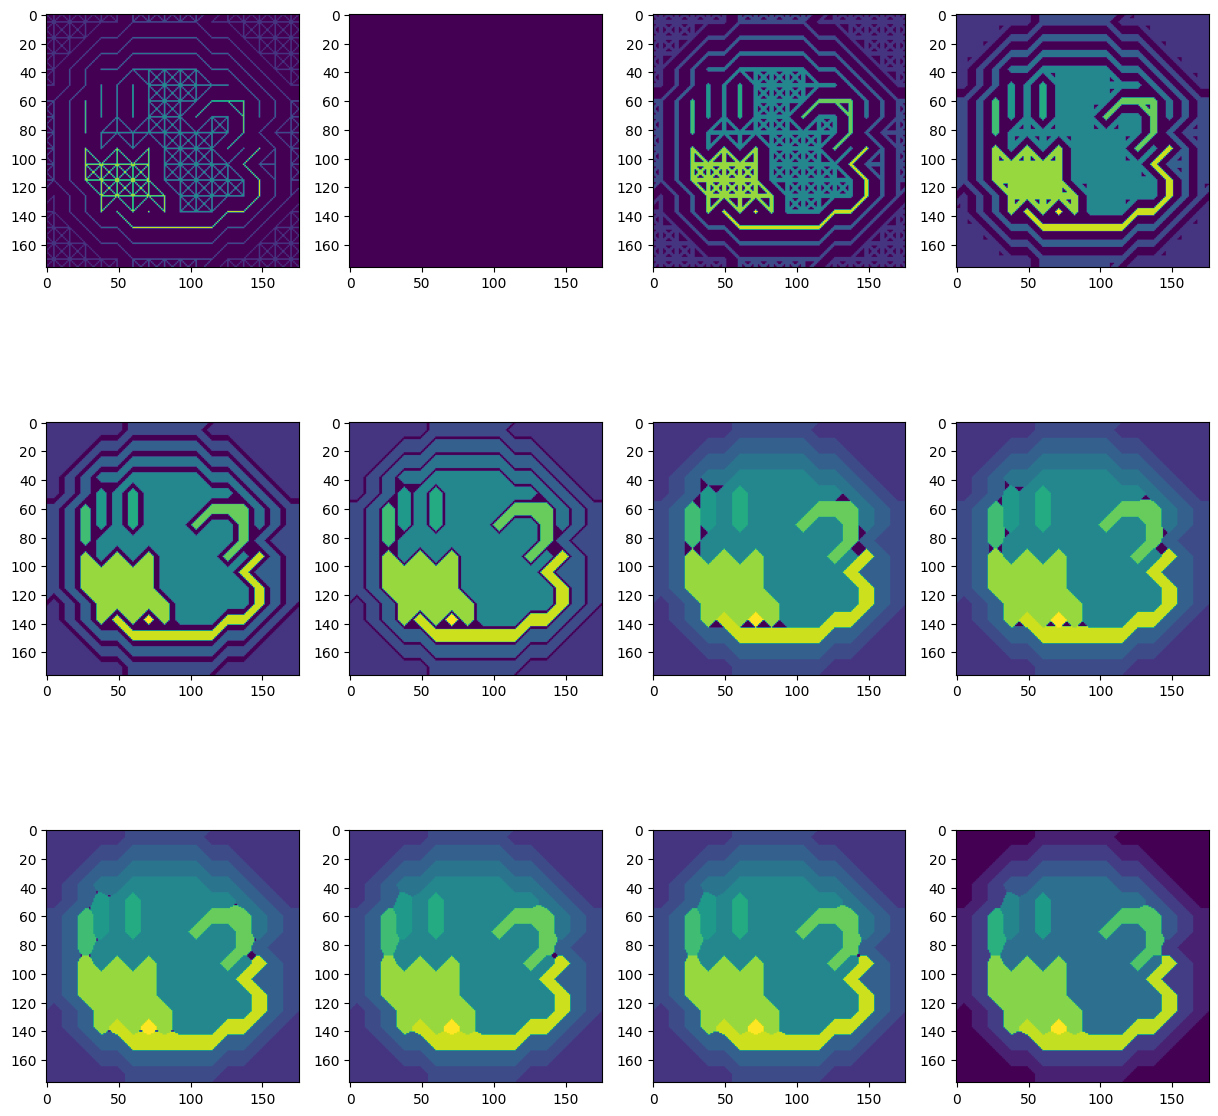

In [34]:
def Closest_Labels(i,j,links_shown):
    #On regarde les labels des voisins
    height,width = np.shape(links_shown)
    labels=np.zeros(4)


    labels[0]=links_shown[clamp(i-1, 0, height-1),j]
    labels[1]=links_shown[clamp(i+1, 0, height-1),j]
    labels[2]=links_shown[i,clamp(j-1, 0, width-1)]
    labels[3]=links_shown[i,clamp(j+1, 0, width-1)]
    # Si on a un unique label non nul on prend la valeur du label
    if np.sum(labels!=0)==1:
        return np.max(labels)

    # Si on a plusieurs label non nuls
    elif np.sum(labels!=0)>1:
        ##si tous les labels sont identiques on prend la valeur du label
        #if np.sum(labels[labels!=0]==labels[labels!=0][0])==np.sum(labels!=0):

        return labels[labels!=0][0]
        ##Sinon on prend la valeur 16 ( arbitraire pour le b spline suivant)
        # else:
        #     return 16

    
    return 0

ext_links=extended_links(links_shown2)

    

Voronoi= np.zeros((new_width,new_height))
temp = np.copy(ext_links)

plt.figure(figsize=(15,15))

plt.subplot(3, 4, 1)
plt.imshow(ext_links)


plt.subplot(3, 4, 2)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)

temp= np.copy(Voronoi)

plt.subplot(3, 4, 3)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)

temp= np.copy(Voronoi)

plt.subplot(3, 4, 4)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)

temp= np.copy(Voronoi)

plt.subplot(3, 4, 5)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)
temp= np.copy(Voronoi)


plt.subplot(3, 4, 6)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)

temp= np.copy(Voronoi)


plt.subplot(3, 4, 7)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)

temp= np.copy(Voronoi)


plt.subplot(3, 4,8)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)


temp= np.copy(Voronoi)

plt.subplot(3, 4, 9)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)


temp= np.copy(Voronoi)

plt.subplot(3, 4, 10)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)


temp= np.copy(Voronoi)

plt.subplot(3, 4,11)
plt.imshow(Voronoi)

for i in range(new_width):
    for j in range(new_height):
        if temp[i,j]!=0:
            Voronoi[i,j]=temp[i,j]
        else:
            Voronoi[i,j]=Closest_Labels(i,j,temp)


temp= np.copy(Voronoi)

plt.subplot(3, 4, 12)
plt.imshow(Voronoi)